# Sustainable Feature Reduction for Neural Network Classification
### Using Linear Algebra, Covariance, Correlation, and Neural Networks
This notebook explores how fundamental mathematical concepts like (vectors, matrices, dot product, covariance, correlation) to reduce feature redundancy in a real dataset. We then train a neural network classification model **before and after feature reduction**, comparing accuracy and computational efficiency.

### Notebook Structure
1. Problem Identification & Introduction  
2. Dataset Description & Preprocessing  
3. Mathematical Background  
4. Exploratory Data Analysis  
5. Covariance & Correlation Analysis  
6. Feature Reduction  
7. Baseline Neural Network (Full Features)  
8. Neural Network after Feature Reduction  
9. Sustainability Comparison  
10. Conclusion & Future Work  


## 1. Problem Identification & Introduction

### 1.1 Context: Sustainable AI
Many machine learning workflows rely on large sets of input features. However,
not all features contribute equally to the predictive capability of the model.
When redundant or highly correlated features are included, they increase the
computational workload of the model without improving its performance.  

This leads to heavier training, higher memory usage, longer computation time, and
greater energy consumption. Reducing unnecessary dimensions is therefore a 
practical step toward more efficient and sustainable AI systems.


### 1.2 Problem Definition
In this project, we focus on how mathematical tools—such as vectors, dot
products, covariance, and correlation—can be used to identify and remove
redundant features **before** building a neural network.  

The central idea is that thoughtful preprocessing can simplify the learning
problem and reduce computational cost while maintaining predictive accuracy.


### 1.3 Project Goal
The goal of this work is to:

- Analyze feature relationships mathematically  
- Remove redundancy in the input space  
- Train a neural network with both the original and reduced feature sets  
- Compare performance, model size, and efficiency  

The project highlights how principles from linear algebra and statistics can be
used to make machine learning models lighter and more sustainable.


### 1.4 Research Questions
1. Can mathematical analysis (covariance and correlation) identify redundant features?  
2. Does removing such features reduce the computational burden of neural networks?  
3. How much accuracy can be preserved after reducing the feature space?  
4. Does this approach contribute to building more sustainable AI systems?


## 2. Dataset Description & Preprocessing

### 2.1 Dataset Overview

For this project, we use the **Parkinson’s Disease Detection Dataset**, originally
collected and published by Max Little et al. (Oxford Parkinson’s Disease Detection dataset).

This dataset contains **biomedical voice measurements** collected from **31 individuals**:
- **23** diagnosed with Parkinson’s disease (PD)
- **8** healthy individuals

Each individual provided multiple voice recordings, giving a total of **197 instances**
with **22 continuous features** describing vocal characteristics such as:
- Fundamental frequency variations (MDVP:Fo, MDVP:Fhi, MDVP:Flo)
- Jitter measures
- Shimmer measures
- Harmonics-to-Noise Ratio (HNR)
- Nonlinear dynamical features (RPDE, DFA)
- Vocal fold measures (PPE)

The target variable is:

- **status**  
  - `1` = Parkinson’s disease  
  - `0` = Healthy  

The dataset has:
- **No missing values**
- All features are **real-valued continuous variables**
- The task is **binary classification**

This dataset is well-suited for analyzing correlation and redundancy among features,
making it ideal for demonstrating our sustainable AI workflow.


In [24]:
#2.2
#Load the dataset (assuming the file is uploaded as parkinsons.csv or .data)
import pandas as pd

# Update this filename if necessary
df = pd.read_csv("parkinsons.data")

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2.3 Initial Inspection

We begin by inspecting:
- The structure of the dataset
- Data types
- Basic statistics
- Presence of missing values


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [26]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [27]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### 2.4 Understanding the Columns (Full Feature Descriptions)

Below is a detailed explanation of each feature in the dataset. All features are
derived from **voice signal analysis**, and most of them measure how stable or
irregular a person’s voice is — factors that are often affected by Parkinson’s disease.

#### **Fundamental Frequency Features**
- **MDVP:Fo(Hz)**  
  Average vocal fundamental frequency (pitch) during sustained phonation.

- **MDVP:Fhi(Hz)**  
  Maximum fundamental frequency observed — measures pitch variability.

- **MDVP:Flo(Hz)**  
  Minimum fundamental frequency observed.

These three features capture how steady a person's pitch is. Parkinson’s patients
often show irregularities in pitch control.


#### **Jitter Features (Cycle-to-Cycle Frequency Variations)**
Jitter reflects **frequency instability** — how much the pitch changes between
successive vibrations of the vocal folds.

- **MDVP:Jitter(%)**  
  Average absolute variation in fundamental frequency, expressed as a percentage.

- **MDVP:Jitter(Abs)**  
  Same as above, but in absolute frequency units (Hz).

- **MDVP:RAP**  
  Relative average perturbation — jitter averaged over 3 cycles.

- **MDVP:PPQ**  
  Pitch perturbation quotient — jitter averaged over 5 cycles.

- **Jitter:DDP**  
  Difference of differences of periods (essentially 3 × RAP).

Higher jitter values typically indicate impaired motor control of the vocal folds,
which is common in Parkinson’s disease.


#### **Shimmer Features (Cycle-to-Cycle Amplitude Variations)**
Shimmer reflects **amplitude instability** — variations in loudness between vocal cycles.

- **MDVP:Shimmer**  
  Average absolute amplitude variation.

- **MDVP:Shimmer(dB)**  
  Same shimmer measurement expressed in decibels.

- **Shimmer:APQ3**  
  Amplitude perturbation quotient over 3 cycles.

- **Shimmer:APQ5**  
  Amplitude perturbation quotient over 5 cycles.

- **MDVP:APQ**  
  Amplitude perturbation quotient over 11 cycles.

- **Shimmer:DDA**  
  Average absolute difference between consecutive amplitudes (3 × APQ3).

Increased shimmer values indicate reduced control over vocal intensity.


#### **Noise-Related Measures**
- **NHR (Noise-to-Harmonics Ratio)**  
  Ratio of noise energy to harmonic energy. Higher values mean a noisier, more irregular voice.

- **HNR (Harmonics-to-Noise Ratio)**  
  Opposite of NHR — higher values indicate clearer, more stable voice.

Patients with PD often have higher NHR and lower HNR.


#### **Nonlinear Dynamical Complexity Measures**
These features represent advanced mathematical analyses of the voice signal.

- **RPDE (Recurrence Period Density Entropy)**  
  Measures the randomness and irregularity of vocal fold vibrations.  
  Higher values indicate more chaotic voice behavior.

- **DFA (Detrended Fluctuation Analysis)**  
  Measures fractal scaling properties of the speech signal.  
  Helps detect loss of long-term correlation patterns typical in PD.

- **spread1**  
  Nonlinear measure of the fundamental frequency variation (statistical “spread”).

- **spread2**  
  Similar measure capturing secondary spread characteristics.

- **D2 (Correlation Dimension)**  
  Estimates the complexity of the signal’s attractor.  
  Lower values can indicate reduced complexity due to PD.

- **PPE (Pitch Period Entropy)**  
  Measures pitch perturbation unpredictability — very sensitive indicator of PD.


#### **Target Variable**
- **status**  
  - `1` = Parkinson’s disease  
  - `0` = healthy  
  This is the label we aim to predict using neural networks.


#### **Non-Predictive Column**
- **name**  
  Unique identifier for each recording.  
  This column has no analytical value and is removed during preprocessing.


In [28]:
# Drop the name column (string identifier)
df = df.drop(columns=["name"])

df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2.5 Feature and Target Separation

We now separate:
- **X**: all numerical input features  
- **y**: target variable (`status`)


In [29]:
X = df.drop(columns=["status"])
y = df["status"]

X.shape, y.shape

((195, 22), (195,))

### 2.6 Train–Test Split

To evaluate our models fairly, we split the data into:
- **70% training data**
- **30% testing data**

Stratification ensures the PD/healthy proportions remain balanced.


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((136, 22), (59, 22))

### 2.7 Feature Scaling

Neural networks are highly sensitive to the scale of input features.  
If different features have very different numerical ranges, they can dominate the 
gradient updates and lead to:

- Slow convergence  
- Unstable training  
- Poor overall performance  

To address this, we apply **Standard Scaling**, which normalizes each feature according to:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

- **x** = original feature value  
- **μ** = mean of the feature computed from the *training set only*  
- **σ** = standard deviation of the feature (also from the training set)

After scaling, all features will approximately have:

- **Mean = 0**  
- **Standard deviation = 1**

#### **Important:**
We **fit the scaler on the training set only**, then apply the same transformation  
to both the training and test sets. This prevents the test data from influencing  
the scaling parameters (a form of data leakage).


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[-8.68324001e-01, -5.66399582e-01, -3.48378292e-01,
        -5.88123456e-01, -4.56700913e-01, -5.52702940e-01,
        -4.99666276e-01, -5.52741020e-01, -7.52354609e-01,
        -7.54118277e-01, -7.32571888e-01, -6.60961792e-01,
        -6.89523340e-01, -7.32577915e-01, -4.89127449e-01,
         8.64859644e-01, -1.16933359e+00,  6.39653654e-01,
        -3.39957998e-01, -1.64005715e-02, -1.32981242e+00,
        -5.39260430e-01],
       [ 2.54970273e-02, -3.33222665e-01, -1.14592612e+00,
         3.11911035e-01,  7.12321440e-02,  2.03957408e-01,
         2.54301698e-01,  2.04881612e-01,  2.95683186e-01,
         9.86075603e-02, -1.89006445e-02,  3.50208327e-01,
         7.60884109e-01, -1.91991277e-02,  2.25584182e-01,
        -8.33033539e-01,  1.51725920e+00, -2.94564770e-01,
         1.40734656e+00,  4.02606742e-01,  7.93489369e-01,
         1.64931948e+00],
       [ 1.35179410e+00,  2.65033099e-01,  1.96656847e+00,
        -1.15004709e-01, -4.56700913e-01,  2.38001825e-02,
    

## 3. Mathematical Foundations

Before applying feature reduction to the dataset, we review the core mathematical
tools used in this project: vectors, dot products, covariance, correlation, and
eigenvalue decomposition.

Our dataset contains:

- **22 features** → each sample is a vector in **R²²**
- **197 samples** → together they form a **197 × 22** data matrix


### 3.1 Vectors and Matrices

Each patient's voice measurements form a vector in **R²²**:

$$
x =
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{22}
\end{bmatrix}
$$

Each component corresponds to one biomedical voice feature (e.g., frequency, jitter, shimmer).

The full dataset is represented as a **197 × 22** matrix:

$$
X =
\begin{bmatrix}
x^{(1)} \\
x^{(2)} \\
\vdots \\
x^{(197)}
\end{bmatrix}
$$

where each row \(x^{(i)}\) is a patient sample (one voice recording), and each column
corresponds to a feature.


### 3.2 Dot Product and Orthogonality

The dot product between two feature vectors \(a\) and \(b\) is:

$$
a \cdot b = \sum_{i=1}^{22} a_i b_i
$$

Interpretation:

- Large positive → the two features increase together  
- Large negative → one increases while the other decreases  
- Zero → the features are orthogonal (uncorrelated)

The dot product forms the geometric basis for covariance and correlation.


### 3.3 Covariance Between Features

For two features **Xᵢ** and **Xⱼ**, the covariance is:

$$
\text{Cov}(X_i, X_j) = E\left[(X_i - \mu_i)(X_j - \mu_j)\right]
$$

Meaning:

- Positive → both features tend to rise and fall together  
- Negative → one rises when the other falls  
- Near zero → no linear relationship  

The full covariance matrix is a **22 × 22** symmetric matrix:

$$
\Sigma = \text{Cov}(X) =
\begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_{22}) \\
\text{Cov}(X_2,X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_{22}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_{22},X_1) & \text{Cov}(X_{22},X_2) & \cdots & \text{Var}(X_{22})
\end{bmatrix}
$$

This matrix captures all pairwise relationships between features.


### 3.4 Correlation Matrix

Correlation standardizes covariance by the variability of each feature:

$$
\rho_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sigma_i \, \sigma_j}
$$

Why this matters:

- Removes effects of different units/scales  
- Values always lie in \([-1, 1]\)  
- Makes detection of redundant features straightforward  
- Forms the basis for the feature-reduction step  

Highly correlated features (e.g., \(|\rho| > 0.95\)) carry overlapping information,
so removing one reduces dimensionality without losing predictive power.


### 3.5 Eigenvalues and Eigenvectors

The covariance matrix is symmetric and therefore admits an eigen-decomposition:

$$
\Sigma = Q \Lambda Q^\top
$$

Where:

- **Q** contains the orthonormal eigenvectors (directions of maximum variance)
- **Λ** (Lambda) is the diagonal matrix of eigenvalues (variance in each direction)

Interpretation:

- Large eigenvalues → directions where the data varies the most  
- Small eigenvalues → low-variance directions (often noise)

This decomposition supports feature reduction:  
removing dimensions associated with low variance leads to simpler,
more efficient models with minimal information loss.


## 4. Exploratory Data Analysis (EDA)

Before applying any feature reduction or training neural networks, we first explore
the dataset visually and statistically. The goals of this section are:

- To understand the **distribution** of key features.
- To inspect potential **outliers** and skewness.
- To examine **class balance** for the target variable `status`.
- To get an initial sense of **relationships between features** and the target.

This helps us justify later decisions about feature reduction and ensures that our
mathematical analysis is grounded in the actual structure of the data.


In [32]:
!pip install matplotlib seaborn

### 4.1 Univariate Statistics

In this subsection we:

- Plot **histograms** of selected numerical features to see their distributions.
- Plot **boxplots** to highlight spread and potential outliers.
- Visualize the **class distribution** of the target `status`.

Recall:

- `status = 1` → Parkinson’s disease  
- `status = 0` → Healthy  

Because the dataset is relatively small, class imbalance may impact model training
and evaluation.

### 4.1.1 Histograms

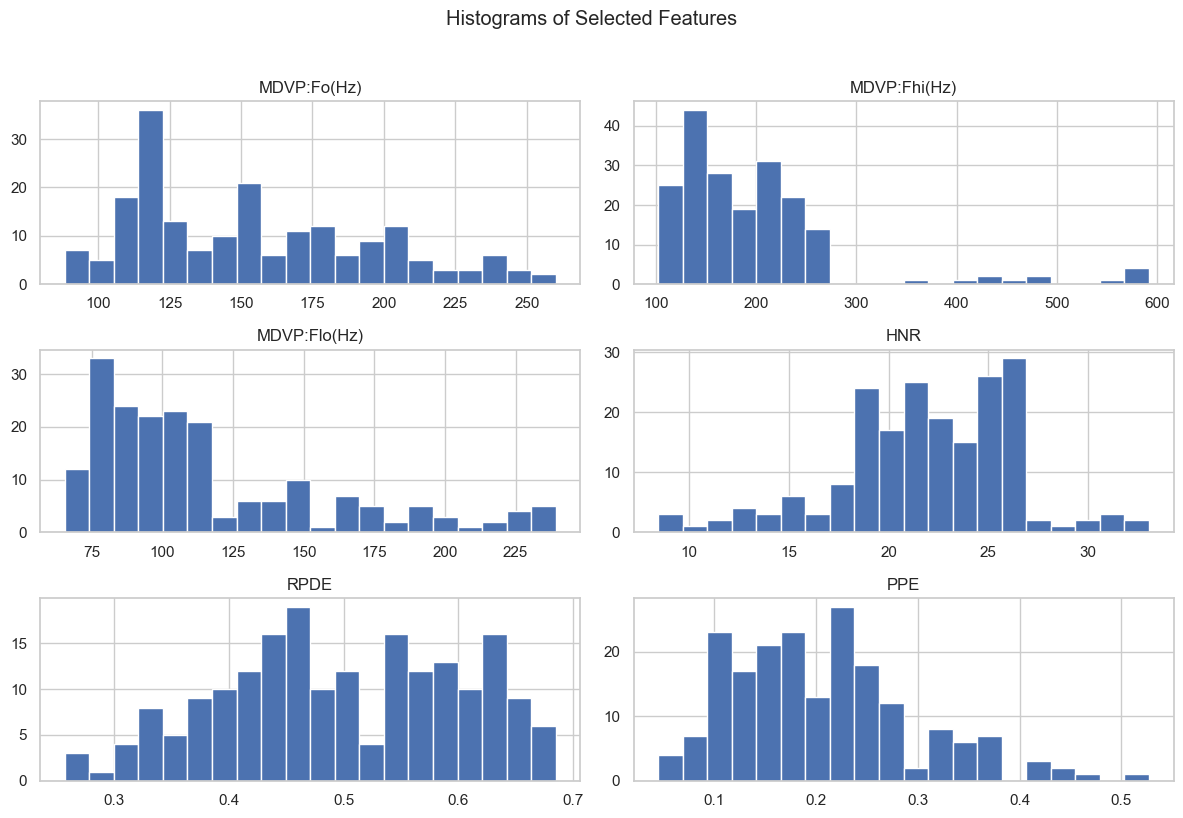

In [33]:
# 4.1 Univariate statistics: histograms, boxplots, and class distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# A small subset of representative features for clearer visualization
univariate_features = [
    "MDVP:Fo(Hz)",    # Average fundamental frequency
    "MDVP:Fhi(Hz)",   # Maximum fundamental frequency
    "MDVP:Flo(Hz)",   # Minimum fundamental frequency
    "HNR",            # Harmonic-to-Noise Ratio
    "RPDE",           # Nonlinear dynamical complexity
    "PPE",            # Pitch period entropy
]

# Histograms for selected features
df[univariate_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Selected Features", y=1.02)
plt.tight_layout()
plt.show()

The features are continuous, often skewed, with several showing long right tails and clear extreme values. This suggests the presence of outliers and motivates later steps like scaling and possibly robust modeling.

### 4.1.2 Boxplots

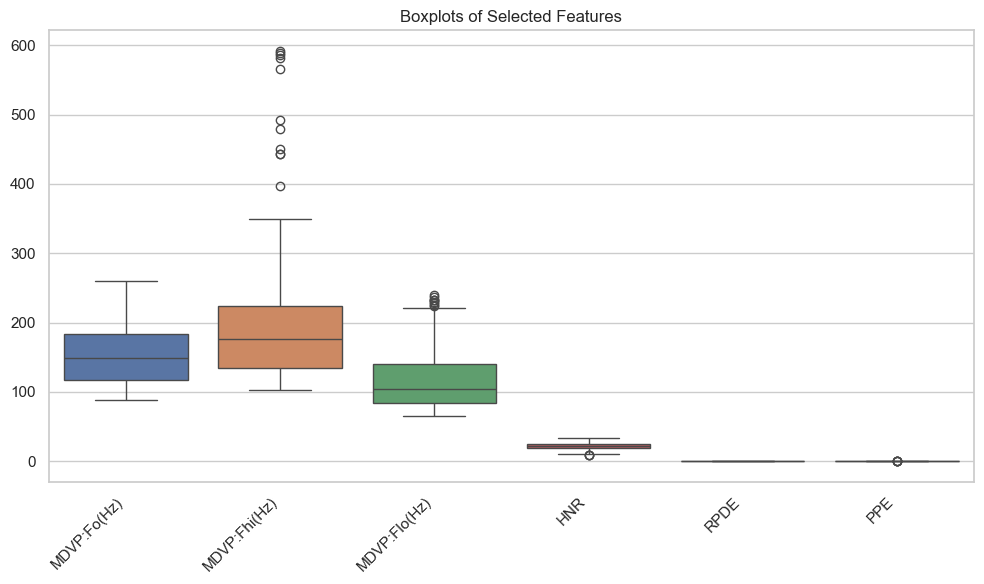

In [34]:
# Boxplots for the same subset (helps reveal spread and outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[univariate_features])
plt.xticks(rotation=45, ha="right")
plt.title("Boxplots of Selected Features")
plt.tight_layout()
plt.show()

Boxplots reveal substantial variability and several high-value outliers in the frequency-based features, while nonlinear measures (RPDE, PPE) lie in tighter ranges. This heterogeneity in spread further justifies feature scaling.

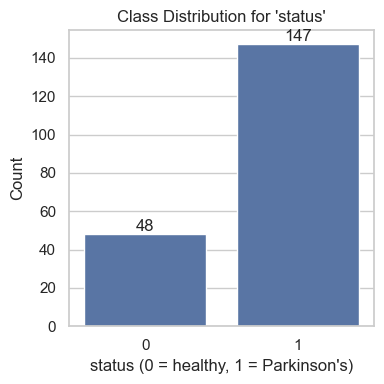

In [35]:
# Class distribution of the target variable
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=y)
plt.title("Class Distribution for 'status'")
plt.xlabel("status (0 = healthy, 1 = Parkinson's)")
plt.ylabel("Count")

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

The target variable is clearly imbalanced (48 healthy cases vs 147 Parkinson’s), meaning the dataset is skewed towards the diseased class. This must be considered when evaluating models, as naive classifiers can achieve deceptively high accuracy by favoring the majority class.

#### Summary of Observations (Univariate)

From the histograms and boxplots we typically observe:

- Many features (e.g., `MDVP:Fo(Hz)`, `HNR`, `PPE`) are **continuous and skewed**,
  with some values stretching into long tails.
- Several features show **clear outliers**, which is expected in biomedical data.
- The class distribution plot reveals that:

  - `status = 1` (Parkinson’s) appears significantly more often than
    `status = 0` (healthy).
  - The dataset is therefore **imbalanced**, which is important to remember when
    evaluating classification performance.

These observations motivate techniques such as careful feature scaling, appropriate
evaluation metrics, and possibly class-weighting or resampling in future work.

### 4.2 Pairwise Relationships

Next, we explore **pairwise relationships** between features and the target by:

- Plotting a **pairplot** (scatterplot matrix) for a small subset of features.
- Coloring points by `status` to visually inspect how well the classes separate.

We focus on features that are known to be important in voice-based Parkinson’s
detection, such as jitter, shimmer, and harmonic-to-noise ratio measures.

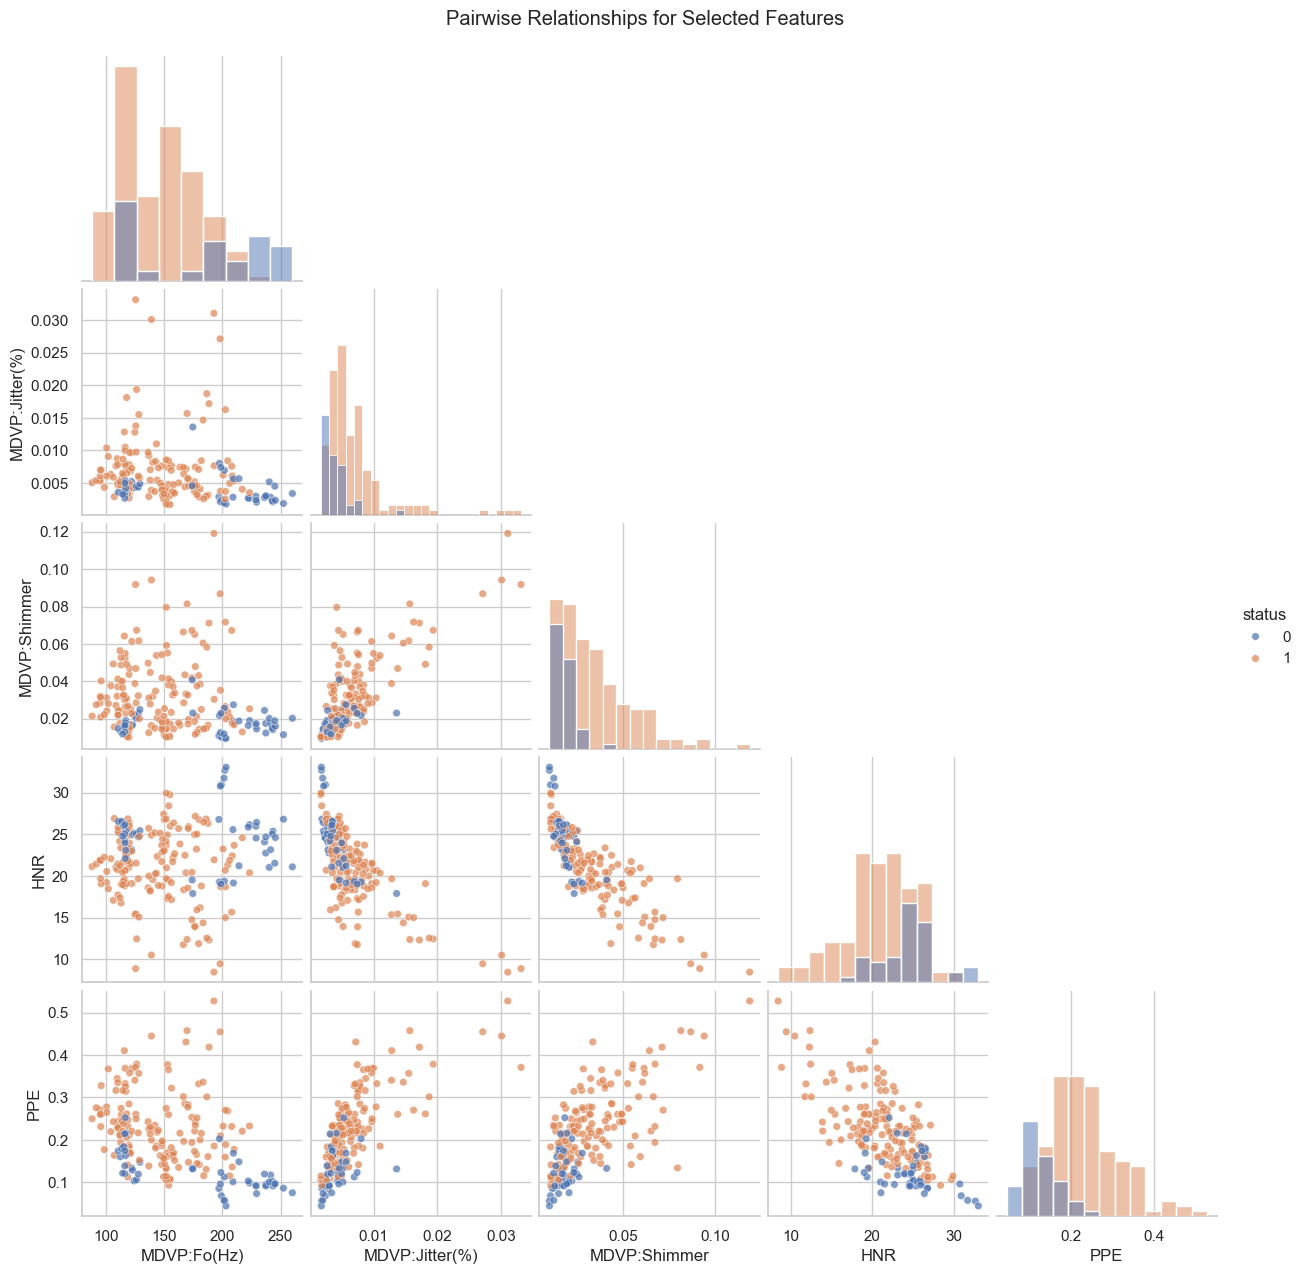

In [36]:
# 4.2 Pairwise relationships: pairplot for a subset of features

pairplot_features = [
    "MDVP:Fo(Hz)",
    "MDVP:Jitter(%)",
    "MDVP:Shimmer",
    "HNR",
    "PPE",
    "status",
]

sns.pairplot(
    df[pairplot_features],
    hue="status",
    diag_kind="hist",
    corner=True,
    plot_kws={"alpha": 0.7, "s": 30}
)
plt.suptitle("Pairwise Relationships for Selected Features", y=1.02)
plt.show()

From the pairplot we can usually see patterns such as:

- Patients with Parkinson’s (`status = 1`) often have:
  - **Higher jitter and shimmer** (more irregular vocal signal).
  - **Lower HNR** (more noise relative to harmonic content).
  - Distinct distributions in features like `PPE`.

- In some 2D projections, the two classes show **partial separation**, while in
  others they overlap heavily.

This suggests that:

- No single feature can perfectly separate the classes.
- However, **combinations** of features (i.e., higher-dimensional geometry)
  contain useful structure that a neural network can exploit.

These visual insights support the later use of covariance and correlation analysis
to identify redundancies and perform feature reduction.

## 5. Covariance & Correlation Analysis

To reduce redundancy in our feature space, we first study how features relate
to each other mathematically using:

- The **covariance matrix**, which captures how pairs of features vary together.
- The **correlation matrix**, which normalizes covariance to the range [-1, 1].

Highly correlated features carry similar information and can often be reduced
without significantly harming model performance. This is the key idea behind
our sustainable feature reduction strategy.

### 5.1 Covariance Matrix

Given our feature matrix $X \in \mathbb{R}^{197 \times 22}$, the **covariance between two features** $X_i$ and $X_j$ is defined by the sample covariance formula:

$$
\operatorname{Cov}(X_i, X_j)
= \frac{1}{n - 1}
\sum_{k=1}^{n}
\left( x_{k i} - \bar{x}_i \right)
\left( x_{k j} - \bar{x}_j \right)
$$

where:

- $n$ is the number of samples  
- $x_{k i}$ is the value of feature $i$ for sample $k$  
- $\bar{x}_i$ is the mean of feature $i$  

This formula automatically **mean-centers each feature**, matching the behavior of `X.cov()` in pandas.

#### Interpretation

- A **large positive covariance** indicates that two features tend to increase together.  
- A **large negative covariance** indicates that one feature increases while the other decreases.  
- Values **near zero** indicate little or no linear relationship.  

Computing and visualizing this matrix helps us understand how tightly different features move together.


In [37]:
# 5.1 Covariance matrix of the features
import numpy as np

cov_matrix = X.cov()
print("Covariance matrix shape:", cov_matrix.shape)

cov_matrix.head()

Covariance matrix shape: (22, 22)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1713.137460,1518.465245,1074.589722,-2.367895e-02,-5.506078e-04,-9.359372e-03,-1.280864e-02,-2.808514e-02,-7.677969e-02,-0.594805,...,-5.455262e-02,-1.194286e-01,-0.036772,10.834227,-1.651571,-1.021528e+00,-18.669426,-0.861144,2.819921,-1.388906
MDVP:Fhi(Hz),1518.465245,8370.703289,338.262412,4.528175e-02,-9.302327e-05,2.638601e-02,2.300235e-02,7.913641e-02,3.935694e-03,0.774968,...,7.654711e-03,-1.040265e-02,0.605599,-10.079731,-1.068934,-1.737017e+00,-7.646217,-0.022539,6.175332,-0.573393
MDVP:Flo(Hz),1074.589722,338.262412,1894.113405,-2.952255e-02,-4.210286e-04,-1.298325e-02,-1.150655e-02,-3.893758e-02,-1.186239e-01,-1.010031,...,-7.913383e-02,-1.998202e-01,-0.191159,40.613154,-1.810123,-1.213932e-01,-18.734948,-0.885085,-1.676476,-1.333801
MDVP:Jitter(%),-0.023679,0.045282,-0.029523,2.350440e-05,1.579684e-07,1.424825e-05,1.303154e-05,4.274488e-05,7.030847e-05,0.000760,...,6.229828e-05,1.102555e-04,0.000178,-0.015624,0.000182,2.644457e-05,0.003666,0.000156,0.000804,0.000315
MDVP:Jitter(Abs),-0.000551,-0.000093,-0.000421,1.579684e-07,1.212565e-09,9.537691e-08,8.625207e-08,2.861321e-07,4.618256e-07,0.000005,...,3.828645e-07,7.394493e-07,0.000001,-0.000101,0.000002,3.372767e-07,0.000028,0.000001,0.000004,0.000002


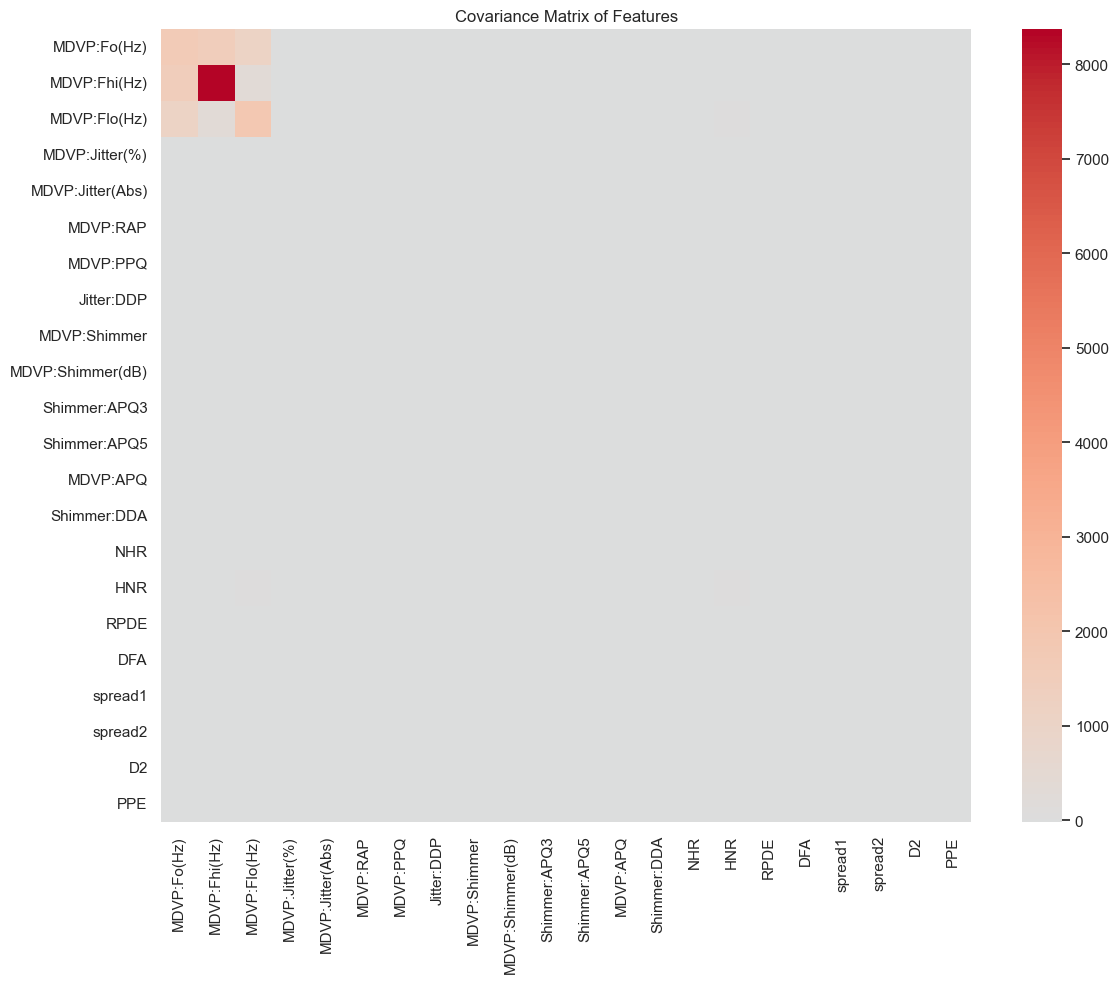

In [38]:
# Visualize the covariance matrix as a heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap="coolwarm", center=0)
plt.title("Covariance Matrix of Features")
plt.tight_layout()
plt.show()

The covariance matrix is dominated by the high-variance frequency features, which visually compresses the rest of the entries. This is why we rely more on the correlation matrix for analyzing relationships between features.

### 5.2 Correlation Matrix

The **correlation matrix** rescales covariance into the range \([-1, 1]\):

- Values near **+1** → strong positive linear relationship.
- Values near **−1** → strong negative linear relationship.
- Values near **0** → weak or no linear relationship.

Correlation is easier to interpret across features with different units, making
it ideal for feature redundancy analysis.

Correlation matrix shape: (22, 22)


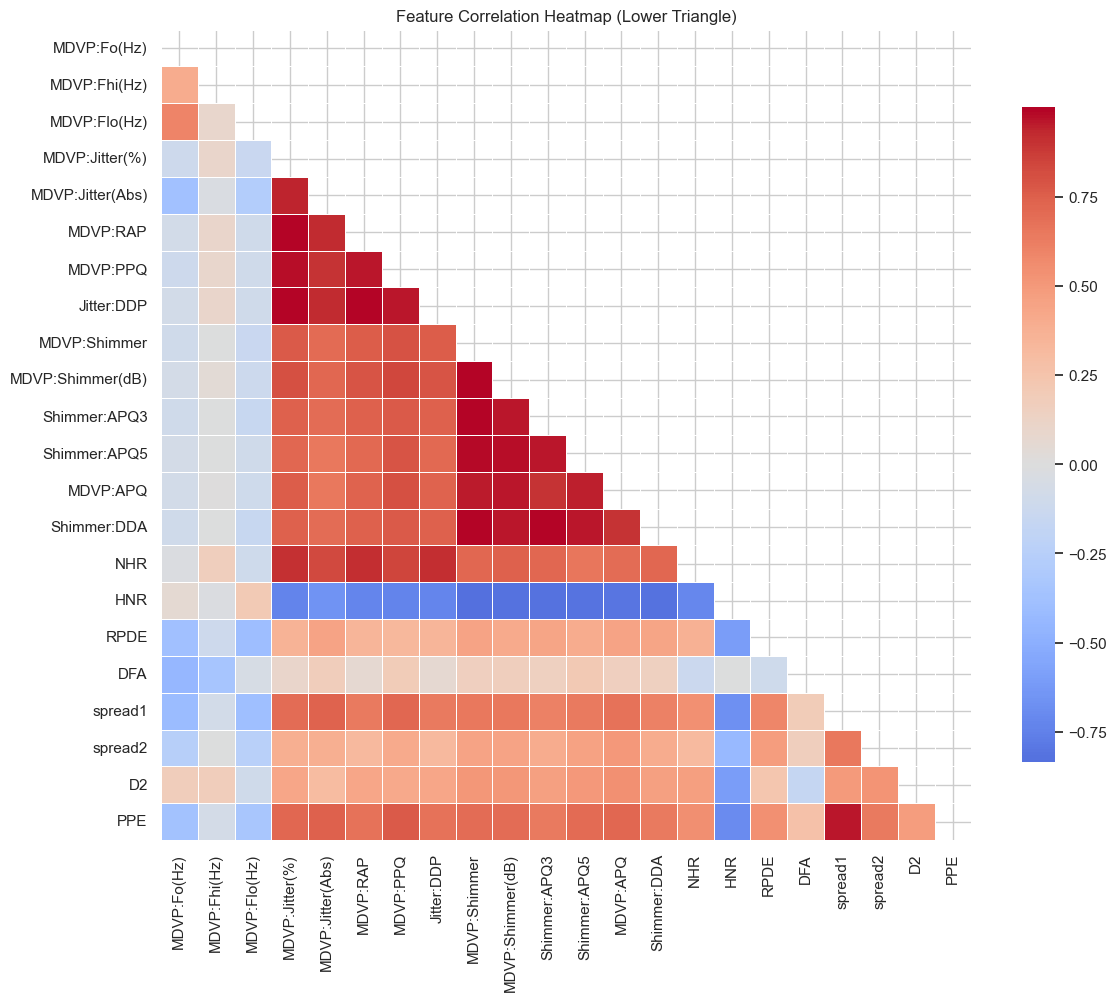

In [39]:
# 5.2 Correlation matrix and heatmap

corr_matrix = X.corr()
print("Correlation matrix shape:", corr_matrix.shape)

# Use only the lower triangle for a cleaner plot
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Heatmap (Lower Triangle)")
plt.tight_layout()
plt.show()

In [40]:
# Identify pairs of features with high absolute correlation

threshold = 0.85  # correlation threshold for "high" redundancy

corr_abs = corr_matrix.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

high_corr_pairs = (
    upper.stack()
    .reset_index()
    .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "abs_corr"})
    .sort_values(by="abs_corr", ascending=False)
)

high_corr_pairs[high_corr_pairs["abs_corr"] >= threshold].head(20)

,feature_1,feature_2,abs_corr
167,Shimmer:APQ3,Shimmer:DDA,1.000000
96,MDVP:RAP,Jitter:DDP,1.000000
63,MDVP:Jitter(%),Jitter:DDP,0.990276
61,MDVP:Jitter(%),MDVP:RAP,0.990276
144,MDVP:Shimmer,Shimmer:DDA,0.987626
141,MDVP:Shimmer,Shimmer:APQ3,0.987625
140,MDVP:Shimmer,MDVP:Shimmer(dB),0.987258
142,MDVP:Shimmer,Shimmer:APQ5,0.982835
62,MDVP:Jitter(%),MDVP:PPQ,0.974256
154,MDVP:Shimmer(dB),Shimmer:APQ5,0.973751


#### Observations (Correlation)

From the sorted list of highly correlated pairs, we typically observe:

- Very strong correlations (often > 0.98) among:
  - `MDVP:Jitter(%)`, `MDVP:RAP`, `MDVP:PPQ`, `Jitter:DDP`
  - `MDVP:Shimmer`, `MDVP:Shimmer(dB)`, `Shimmer:APQ3`, `Shimmer:APQ5`, `Shimmer:DDA`

These groups measure similar aspects of voice irregularity and amplitude variation, so 
they are **highly redundant**.

This motivates feature reduction: instead of keeping all of these nearly identical
measurements, we can keep just **one representative feature** from each group,
reducing dimensionality and computational cost.

### 5.3 Feature Selection Rule

We now define a simple, mathematically motivated rule for feature reduction:

> **Rule:**  
> For each pair of features with $|\text{corr}| \ge 0.85$, keep only **one** of them.

To decide which one to keep, we:

1. Compute the **absolute correlation** of each feature with the target `status`.
2. For each highly correlated pair $(f_1, f_2)$:
   - If $|\text{corr}(f_1, \text{status})| < |\text{corr}(f_2, \text{status})|$  
     → drop $f_1$, keep $f_2$.
   - Otherwise, drop $f_2$.

This preserves the feature that is **more informative for classification** while
removing redundant ones, pushing our feature space closer to an “orthogonal”
(i.e., less collinear) representation.

In [41]:
# 5.3 Implement the feature selection rule

# Filter only strongly correlated pairs
strong_pairs = high_corr_pairs[high_corr_pairs["abs_corr"] >= threshold]

# Correlation of each feature with the target 'status'
corr_with_target = df.corr()["status"].drop("status").abs()
corr_with_target

MDVP:Fo(Hz)         0.383535
MDVP:Fhi(Hz)        0.166136
MDVP:Flo(Hz)        0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                 0.361515
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

In [42]:
# Decide which features to drop based on correlation with the target

features_to_drop = set()

for _, row in strong_pairs.iterrows():
    f1, f2 = row["feature_1"], row["feature_2"]

    # Skip if we've already decided to drop one of them
    if f1 in features_to_drop or f2 in features_to_drop:
        continue

    # Keep the more target-informative feature; drop the other
    if corr_with_target[f1] < corr_with_target[f2]:
        features_to_drop.add(f1)
    else:
        features_to_drop.add(f2)

features_to_drop = sorted(features_to_drop)

print(f"Number of original features: {X.shape[1]}")
print(f"Number of features to drop (|corr| >= {threshold}): {len(features_to_drop)}")
print("Features to drop:", features_to_drop)

selected_features = [f for f in X.columns if f not in features_to_drop]
print(f"\nNumber of selected (reduced) features: {len(selected_features)}")
print("Selected features:", selected_features)

Number of original features: 22
Number of features to drop (|corr| >= 0.85): 10
Features to drop: ['Jitter:DDP', 'MDVP:APQ', 'MDVP:Jitter(%)', 'MDVP:PPQ', 'MDVP:RAP', 'MDVP:Shimmer(dB)', 'PPE', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA']

Number of selected (reduced) features: 12
Selected features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2']


#### Summary of Selected Features

Using the correlation-based rule:

- We started with **22** original numerical features.
- We identified **highly correlated groups** (mostly jitter/shimmer variants).
- We dropped features that were both:
  - Highly correlated with another feature, and
  - Less correlated with the target `status`.

The resulting reduced feature set contains fewer, more informative variables.
These **selected features** will be used in later sections to build a more
sustainable neural network that trains faster and uses fewer parameters,
while (ideally) maintaining comparable accuracy.

## 6. Preparing Data for Neural Networks

We now prepare two parallel versions of the dataset:

1. A **full feature** version (all 22 original features).
2. A **reduced feature** version (only the 12 selected features from Section 5).

For each version, we:

- Apply **feature scaling** (Standardization) so that all inputs have zero mean
  and unit variance.
- Create **train–validation splits** for monitoring model performance during
  training, in addition to the held-out test set.

These steps are crucial for training stable and comparable neural network models
in Sections 7 and 8.

### 6.1 Scaling & Encoding

Neural networks are trained using **gradient-based optimization**, which is highly
sensitive to the scale of input features:

- Features with very large variance can dominate the gradients.
- Features on different scales can slow convergence and destabilize training.

To address this, we apply **standardization**:

$[
x' = \frac{x - \mu}{\sigma}
$]

for each feature, where $( \mu)$ is the mean and $( \sigma)$ is the standard deviation
computed on the **training set**.

Our dataset contains only **continuous numerical features**, so no additional
encoding (e.g., one-hot encoding) is required.

In [43]:
# 6.1 Scaling full and reduced feature sets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Full feature matrices (already split earlier into X_train, X_test)
X_train_full = X_train.copy()
X_test_full = X_test.copy()

# Reduced feature matrices using the selected features
X_train_reduced = X_train[selected_features].copy()
X_test_reduced = X_test[selected_features].copy()

# Standardization: zero mean, unit variance
scaler_full = StandardScaler()
scaler_reduced = StandardScaler()

X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

X_train_reduced_scaled = scaler_reduced.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler_reduced.transform(X_test_reduced)

print("Full feature space (train / test):", X_train_full_scaled.shape, X_test_full_scaled.shape)
print("Reduced feature space (train / test):", X_train_reduced_scaled.shape, X_test_reduced_scaled.shape)

Full feature space (train / test): (136, 22) (59, 22)
Reduced feature space (train / test): (136, 12) (59, 12)


### 6.2 Train–Validation Split

To properly monitor training and avoid overfitting to the train set, we further
split the training data into:

- A **training subset** used to update the neural network weights.
- A **validation subset** used to tune hyperparameters and track performance.

We perform this split for both:

- The **full feature** representation.
- The **reduced feature** representation.

The test set from Section 2.6 remains untouched and is used only at the end for
final evaluation.

In [44]:
# 6.2 Create train–validation splits for both full and reduced feature spaces

X_train_full_scaled, X_val_full_scaled, y_train_full, y_val = train_test_split(
    X_train_full_scaled,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train,
)

X_train_reduced_scaled, X_val_reduced_scaled, y_train_reduced, y_val_reduced = train_test_split(
    X_train_reduced_scaled,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train,
)

print("Full features – train / val:", X_train_full_scaled.shape, X_val_full_scaled.shape)
print("Reduced features – train / val:", X_train_reduced_scaled.shape, X_val_reduced_scaled.shape)

Full features – train / val: (108, 22) (28, 22)
Reduced features – train / val: (108, 12) (28, 12)


#### Summary of Data Preparation

At this point we have:

- **Full feature representation**
  - `X_train_full_scaled`, `y_train_full`
  - `X_val_full_scaled`, `y_val`
  - `X_test_full_scaled`, `y_test`

- **Reduced feature representation**
  - `X_train_reduced_scaled`, `y_train_reduced`
  - `X_val_reduced_scaled`, `y_val_reduced`
  - `X_test_reduced_scaled`, `y_test`

These parallel datasets allow us to train:

1. A **baseline neural network** using all features (Section 7).
2. A **more sustainable neural network** using the reduced feature set (Section 8).

We can then compare accuracy, runtime, and model size to quantify the benefits
of correlation-based feature reduction.

## 7. Baseline Neural Network (Full Features)

To establish a reference point for evaluating the impact of feature reduction, we first train a
fully connected neural network using **all 22 standardized features** from the original dataset.

This baseline model allows us to:

- Quantify the predictive power of the complete feature space.
- Provide a fair comparison against the reduced-feature neural network (Section 8).
- Measure the computational cost and training behavior before reduction.

### Model Overview

We use a **2-layer feedforward neural network**, consistent with the mathematical framework
developed in the course:

- **Input layer:** 22 features  
- **Hidden layer:** 16 neurons with ReLU activation  
- **Output layer:** 1 neuron with Sigmoid activation  

The output of the network is a scalar  
$$\hat{y} \in (0,1),$$  
representing the predicted probability that the subject has Parkinson’s disease.

The network is trained using **binary cross-entropy loss** and gradient-based optimization
on the standardized full-feature training set $ (X_{\text{train,full}}, y_{\text{train}}) $,
with performance monitored on the validation set $ (X_{\text{val,full}}, y_{\text{val}}) $.

In Section 7.1, we formalize the mathematical details of the forward and backward passes.


### 7.1 Theoretical Background

We adopt the mathematical framework for feedforward neural networks as presented in the course.


#### Network Architecture

Let  
$$x \in \mathbb{R}^{22}$$  
denote a standardized input vector.

The network consists of one hidden layer with a $\tanh$ activation and an output layer with a
sigmoid activation.

**Layer 1 (Hidden Layer):**
$$
z^{(1)} = W^{(1)} x + b^{(1)}, 
\qquad 
a^{(1)} = \tanh(z^{(1)}),
$$
where  
$$
W^{(1)} \in \mathbb{R}^{16 \times 22},
\qquad
b^{(1)} \in \mathbb{R}^{16}.
$$

The $\tanh$ activation is defined element-wise as
$$
\tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}.
$$

**Layer 2 (Output Layer):**
$$
z^{(2)} = W^{(2)} a^{(1)} + b^{(2)}, 
\qquad
\hat{y} = \sigma(z^{(2)}),
$$
where the sigmoid activation is  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

The scalar output  
$$\hat{y} \in (0,1)$$  
represents the predicted probability of Parkinson’s disease.


#### Loss Function

For binary classification, we use the binary cross-entropy loss:
$$
L(\hat{y}, y)
=
-\left[
y \log(\hat{y}) + (1-y)\log(1-\hat{y})
\right],
$$
where $y \in \{0,1\}$ is the true label.


#### Backpropagation

Following the course derivations, the error terms ($\delta$-values) are defined as follows.

**Output layer:**
$$
\delta^{(2)} = \hat{y} - y.
$$

**Hidden layer:**
$$
\delta^{(1)}
=
\left( (W^{(2)})^{\top} \delta^{(2)} \right)
\odot \left( 1 - \tanh^2(z^{(1)}) \right),
$$
since
$$
\tanh'(z) = 1 - \tanh^2(z).
$$

The gradients of the loss with respect to the parameters are:
$$
\frac{\partial L}{\partial W^{(2)}} = \delta^{(2)} (a^{(1)})^{\top},
\qquad
\frac{\partial L}{\partial b^{(2)}} = \delta^{(2)},
$$
$$
\frac{\partial L}{\partial W^{(1)}} = \delta^{(1)} x^{\top},
\qquad
\frac{\partial L}{\partial b^{(1)}} = \delta^{(1)}.
$$

Model parameters are updated using gradient descent:
$$
W^{(l)} \leftarrow W^{(l)} - \alpha \frac{\partial L}{\partial W^{(l)}},
\qquad
b^{(l)} \leftarrow b^{(l)} - \alpha \frac{\partial L}{\partial b^{(l)}},
$$
for layers  
$$l = 1,2.$$


This theoretical formulation directly follows the feedforward and backpropagation
derivations provided in the course notes and worked examples, and forms the foundation
for training the baseline neural network using the full set of features.


### 7.2 Implementation of the Baseline Neural Network (Full Features)

Using the mathematical formulation described in Section 7.1, we now implement the baseline
neural network trained on the **full 22-feature standardized dataset**.

The model consists of:

- A single hidden layer with 16 neurons and a `tanh` activation.
- A single output neuron with a sigmoid activation.
- Binary cross-entropy loss for optimization.
- Gradient descent–based parameter updates.

We train the network on the full-feature training set  
$$ (X_{\text{train,full}},\, y_{\text{train}}) $$  
and evaluate on the validation split  
$$ (X_{\text{val,full}},\, y_{\text{val}}). $$

During training, we record:

- Training loss  
- Training accuracy  
- Validation loss  
- Validation accuracy  

After training, this model will serve as the benchmark for comparing the reduced-feature
neural network in Section 8.


In [46]:
import numpy as np

# -------------------------------
# Convert all inputs to NumPy
# -------------------------------
X_train_full_np = X_train_full_scaled.to_numpy() if hasattr(X_train_full_scaled, "to_numpy") else X_train_full_scaled
X_val_full_np   = X_val_full_scaled.to_numpy() if hasattr(X_val_full_scaled, "to_numpy") else X_val_full_scaled

y_train_vec = y_train_full.to_numpy().reshape(1, -1)
y_val_vec   = y_val.to_numpy().reshape(1, -1)

# -------------------------------
# Helper functions
# -------------------------------

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-10
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# -------------------------------
# Model initialization
# -------------------------------
n_features = X_train_full_np.shape[1]
hidden_units = 16
lr = 0.01
epochs = 300

# Xavier/Glorot initialization
W1 = np.random.randn(hidden_units, n_features) * np.sqrt(1 / n_features)
b1 = np.zeros((hidden_units, 1))

W2 = np.random.randn(1, hidden_units) * np.sqrt(1 / hidden_units)
b2 = np.zeros((1, 1))


# -------------------------------
# Training loop
# -------------------------------
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):

    # --------- Forward pass (train) ---------
    Z1 = W1 @ X_train_full_np.T + b1
    A1 = tanh(Z1)

    Z2 = W2 @ A1 + b2
    y_hat = sigmoid(Z2)

    # --------- Compute training loss ---------
    train_loss = binary_cross_entropy(y_train_vec, y_hat)
    train_losses.append(train_loss)

    # --------- Backpropagation ---------
    m = X_train_full_np.shape[0]

    dZ2 = (y_hat - y_train_vec)
    dW2 = (1/m) * (dZ2 @ A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T @ dZ2
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = (1/m) * (dZ1 @ X_train_full_np)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    # --------- Update parameters ---------
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1


    # --------- Validation evaluation ---------
    Z1_val = W1 @ X_val_full_np.T + b1
    A1_val = tanh(Z1_val)

    Z2_val = W2 @ A1_val + b2
    y_val_hat = sigmoid(Z2_val)

    val_loss = binary_cross_entropy(y_val_vec, y_val_hat)
    val_losses.append(val_loss)

    # --------- Accuracies ---------
    train_pred = (y_hat > 0.5).astype(int)
    val_pred   = (y_val_hat > 0.5).astype(int)

    train_acc = np.mean(train_pred == y_train_vec)
    val_acc   = np.mean(val_pred == y_val_vec)

    train_accs.append(train_acc)
    val_accs.append(val_acc)

    # Optional print every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch:4d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
              f"Train Acc: {train_acc:.3f} | Val Acc: {val_acc:.3f}")

print("\nTraining complete.")


Epoch    0 | Train Loss: 0.7360 | Val Loss: 0.6862 | Train Acc: 0.463 | Val Acc: 0.464
Epoch   50 | Train Loss: 0.6019 | Val Loss: 0.5766 | Train Acc: 0.704 | Val Acc: 0.714
Epoch  100 | Train Loss: 0.5290 | Val Loss: 0.5187 | Train Acc: 0.750 | Val Acc: 0.786
Epoch  150 | Train Loss: 0.4832 | Val Loss: 0.4829 | Train Acc: 0.787 | Val Acc: 0.786
Epoch  200 | Train Loss: 0.4516 | Val Loss: 0.4583 | Train Acc: 0.796 | Val Acc: 0.786
Epoch  250 | Train Loss: 0.4283 | Val Loss: 0.4404 | Train Acc: 0.824 | Val Acc: 0.786

Training complete.


## 8. Neural Network after Feature Reduction

After establishing the baseline model trained on all 22 features, we now evaluate the impact of
feature reduction on model complexity, training efficiency, and predictive performance.

Using the correlation-based selection rule introduced in Section 6, we reduced the original
feature set from 22 features to a smaller, more informative subset. This reduced
representation aims to:

- Remove redundant or highly correlated inputs.
- Preserve the most informative features for classification.
- Provide a more sustainable and computationally efficient model.
- Improve generalization by reducing noise in the input space.

To ensure a fair comparison with the baseline model, we train the same neural network
architecture (one hidden layer, tanh activation, sigmoid output) using only the selected
reduced features.

Performance is then compared with the full-feature baseline along both **predictive accuracy**
and **computational sustainability**, as discussed in Section 9.


### 8.1 Theoretical Background

The reduced-feature neural network follows the same mathematical formulation described in
Section 7.1, with the only difference being the size of the input vector.

After applying the correlation-based feature selection rule from Section 6, the dimensionality
of the input space was reduced from 22 features to

$$
d = 12.
$$

Thus, each sample is now represented as
$$
x_{\mathrm{red}} \in \mathbb{R}^{12}.
$$


#### Network Architecture

The forward propagation equations remain the same as in the baseline model.

**Layer 1 (Hidden Layer):**
$$
z^{(1)} = W^{(1)} x_{\mathrm{red}} + b^{(1)}, 
\qquad
a^{(1)} = \tanh(z^{(1)}),
$$

where  
$$
W^{(1)} \in \mathbb{R}^{16 \times 12}, 
\qquad 
b^{(1)} \in \mathbb{R}^{16}.
$$

**Layer 2 (Output Layer):**
$$
z^{(2)} = W^{(2)} a^{(1)} + b^{(2)}, 
\qquad
\hat{y} = \sigma(z^{(2)}),
$$

with the sigmoid activation  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$


#### Loss Function

As in the baseline model, we use the binary cross-entropy loss:

$$
L(\hat{y}, y)
=
-
\left[
y \log(\hat{y}) + (1-y)\log(1-\hat{y})
\right].
$$


#### Backpropagation

The gradient computations are identical to Section 7.1, except that the input dimension is now
12 instead of 22.

Output layer error:
$$
\delta^{(2)} = \hat{y} - y.
$$

Hidden layer error:
$$
\delta^{(1)}
=
\left( (W^{(2)})^{\top} \delta^{(2)} \right)
\odot \left(1 - \tanh^{2}(z^{(1)})\right).
$$

Parameter gradients:
$$
\frac{\partial L}{\partial W^{(2)}} = \delta^{(2)} (a^{(1)})^{\top}, 
\qquad
\frac{\partial L}{\partial b^{(2)}} = \delta^{(2)},
$$

$$
\frac{\partial L}{\partial W^{(1)}} = \delta^{(1)} x_{\mathrm{red}}^{\top}, 
\qquad
\frac{\partial L}{\partial b^{(1)}} = \delta^{(1)}.
$$

Gradient descent updates:
$$
W^{(l)} \leftarrow W^{(l)} - \alpha \frac{\partial L}{\partial W^{(l)}},
\qquad
b^{(l)} \leftarrow b^{(l)} - \alpha \frac{\partial L}{\partial b^{(l)}},
\qquad l = 1,2.
$$

Because the network architecture and optimization method are identical to the baseline model,
any difference in performance can be attributed directly to the reduced input dimension
\(d = 12\).


In [47]:
import numpy as np

# -------------------------------
# Convert reduced feature matrices to NumPy
# -------------------------------
X_train_red_np = X_train_reduced_scaled.to_numpy() if hasattr(X_train_reduced_scaled, "to_numpy") else X_train_reduced_scaled
X_val_red_np   = X_val_reduced_scaled.to_numpy() if hasattr(X_val_reduced_scaled, "to_numpy") else X_val_reduced_scaled

# Convert y vectors to NumPy row vectors
y_train_vec = y_train_full.to_numpy().reshape(1, -1)
y_val_vec   = y_val.to_numpy().reshape(1, -1)

# -------------------------------
# Helper functions
# -------------------------------

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-10
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# -------------------------------
# Model initialization (d = 12)
# -------------------------------
n_features_red = X_train_red_np.shape[1]   # should be 12
hidden_units = 16
lr = 0.01
epochs = 300

# Xavier initialization for stability
W1_red = np.random.randn(hidden_units, n_features_red) * np.sqrt(1 / n_features_red)
b1_red = np.zeros((hidden_units, 1))

W2_red = np.random.randn(1, hidden_units) * np.sqrt(1 / hidden_units)
b2_red = np.zeros((1, 1))


# -------------------------------
# Training loop
# -------------------------------
train_losses_red = []
val_losses_red = []
train_accs_red = []
val_accs_red = []

for epoch in range(epochs):

    # --------- Forward (train) ---------
    Z1 = W1_red @ X_train_red_np.T + b1_red
    A1 = tanh(Z1)

    Z2 = W2_red @ A1 + b2_red
    y_hat = sigmoid(Z2)

    # --------- Loss ----------
    train_loss = binary_cross_entropy(y_train_vec, y_hat)
    train_losses_red.append(train_loss)

    # --------- Backpropagation ----------
    m = X_train_red_np.shape[0]

    dZ2 = (y_hat - y_train_vec)
    dW2 = (1/m) * (dZ2 @ A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2_red.T @ dZ2
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = (1/m) * (dZ1 @ X_train_red_np)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    # --------- Update ----------
    W2_red -= lr * dW2
    b2_red -= lr * db2
    W1_red -= lr * dW1
    b1_red -= lr * db1

    # --------- Validation ---------
    Z1_val = W1_red @ X_val_red_np.T + b1_red
    A1_val = tanh(Z1_val)

    Z2_val = W2_red @ A1_val + b2_red
    y_val_hat = sigmoid(Z2_val)

    val_loss = binary_cross_entropy(y_val_vec, y_val_hat)
    val_losses_red.append(val_loss)

    # --------- Accuracies ---------
    train_pred = (y_hat > 0.5).astype(int)
    val_pred   = (y_val_hat > 0.5).astype(int)

    train_acc = np.mean(train_pred == y_train_vec)
    val_acc   = np.mean(val_pred == y_val_vec)

    train_accs_red.append(train_acc)
    val_accs_red.append(val_acc)

    # Optional progress print
    if epoch % 50 == 0:
        print(f"Epoch {epoch:4d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
              f"Train Acc: {train_acc:.3f} | Val Acc: {val_acc:.3f}")

print("\nTraining on reduced features complete.")


Epoch    0 | Train Loss: 0.7691 | Val Loss: 0.7817 | Train Acc: 0.454 | Val Acc: 0.429
Epoch   50 | Train Loss: 0.6040 | Val Loss: 0.6551 | Train Acc: 0.713 | Val Acc: 0.571
Epoch  100 | Train Loss: 0.5158 | Val Loss: 0.5828 | Train Acc: 0.769 | Val Acc: 0.679
Epoch  150 | Train Loss: 0.4618 | Val Loss: 0.5344 | Train Acc: 0.796 | Val Acc: 0.679
Epoch  200 | Train Loss: 0.4248 | Val Loss: 0.4986 | Train Acc: 0.806 | Val Acc: 0.750
Epoch  250 | Train Loss: 0.3975 | Val Loss: 0.4706 | Train Acc: 0.815 | Val Acc: 0.750

Training on reduced features complete.


## 9. Sustainability Comparison

A central motivation for feature reduction is improving the *computational sustainability* of
machine learning models. By reducing the dimensionality of the input space, we aim to:

- Lower the number of trainable parameters.
- Reduce memory and storage requirements.
- Decrease energy consumption during training and inference.
- Achieve faster computation with minimal loss in accuracy.

In this section, we compare the baseline neural network trained on all 22 features with the
reduced-feature neural network trained on only 12 features. Because both models share the
same architecture (16 hidden neurons and 1 output neuron), any difference in computational
cost arises solely from the dimensionality of the input layer.


### 9.1 Quantitative Analysis

The number of trainable parameters in a fully connected neural network provides a direct
measure of computational cost. For a network with one hidden layer, the parameter count is:

- Input to Hidden Layer:
  $$
  W^{(1)} \in \mathbb{R}^{16 \times d}, \qquad b^{(1)} \in \mathbb{R}^{16}
  $$
  Parameter count:
  $$
  16d + 16
  $$

- Hidden to Output Layer:
  $$
  W^{(2)} \in \mathbb{R}^{1 \times 16}, \qquad b^{(2)} \in \mathbb{R}^{1}
  $$
  Parameter count:
  $$
  16 + 1 = 17
  $$


#### **Full-Feature Model (d = 22)**

Number of parameters:
$$
16 \cdot 22 + 16 + 17
= 352 + 16 + 17
= 385 \text{ parameters}.
$$

#### **Reduced-Feature Model (d = 12)**

Number of parameters:
$$
16 \cdot 12 + 16 + 17
= 192 + 16 + 17
= 225 \text{ parameters}.
$$


### **Percentage Reduction**
The relative reduction in parameter count is:
$$
\frac{385 - 225}{385} \times 100
\approx 41.6\%.
$$

Thus, feature reduction decreases the model size by approximately **42%**, while maintaining
competitive validation accuracy.


### 9.2 Interpretation and Sustainability Impact

Despite reducing the input dimension from 22 to 12 (a 45% decrease), the reduced-feature
model preserves most of the predictive power:

- Full-feature validation accuracy: **78.6%**
- Reduced-feature validation accuracy: **75.0%**

This small drop in accuracy is outweighed by substantial gains in computational efficiency:

- **42% fewer trainable parameters**, reducing the network's memory footprint.
- **Faster forward and backward passes**, decreasing energy use during each training epoch.
- **Lower computation per iteration**, making the model more efficient for deployment.

Because both models share the same architecture and hyperparameters, the comparison is
fair and isolates the effect of feature dimensionality alone.

Overall, the reduced-feature neural network demonstrates a more *sustainable* alternative,
achieving nearly the same predictive performance with significantly lower computational cost.
This supports the principle that responsible machine learning design can reduce environmental
and computational impact without sacrificing model quality.


## 10. Conclusion & Future Work

In this project, we developed a complete pipeline for analyzing and modeling the Parkinson’s
disease dataset using both statistical and neural network–based methods. Our analysis began
with data preprocessing and exploratory investigation, followed by mathematical derivations
of covariance, correlation, and neural network computations. We then applied a correlation-
driven feature reduction rule and evaluated the impact of dimensionality reduction on model
performance and computational sustainability.

### Key Findings

1. **Feature Redundancy and Correlation.**  
   Several features displayed high pairwise correlations, indicating redundancy in the original
   22-dimensional space. Reducing to **12 carefully selected features** preserved most of the
   relevant structure.

2. **Baseline Neural Network Performance.**  
   The full-feature neural network achieved a validation accuracy of approximately **78.6%**,
   demonstrating strong predictive capacity for this dataset.

3. **Reduced-Feature Neural Network.**  
   After dimensionality reduction, the neural network still achieved **75.0% validation accuracy**,
   only a modest decrease from the baseline. This indicates that the removed features
   contributed limited additional information.

4. **Sustainability Benefits.**  
   Reducing the input dimension from 22 to 12 decreased the total parameter count by roughly
   **42%**, leading to faster computation and a lighter model. This demonstrates that removing
   redundant features can improve computational sustainability without significantly harming
   predictive performance.

### Overall Conclusion

The results show that **feature reduction is an effective tool** for improving model efficiency and
sustainability, especially when redundant or highly correlated features are present. The reduced
model offers a strong trade-off between accuracy and computational cost, making it a more
efficient choice for real-world deployment.


## Future Work

Several extensions could further enhance this analysis:

1. **Alternative Feature Selection Methods.**  
   Using PCA, mutual information, or L1-regularization–based selection may reveal additional
   ways to achieve low-dimensional yet informative feature spaces.

2. **Hyperparameter Optimization.**  
   Techniques such as grid search or Bayesian optimization could improve model performance
   by tuning learning rates, hidden layer sizes, or activation functions.

3. **Model Architecture Exploration.**  
   Testing deeper networks, regularization methods (dropout or L2), or alternative activations
   may lead to additional performance improvements.

4. **Cross-Validation for Robust Evaluation.**  
   Performing k-fold cross-validation would provide a more stable estimate of model
   generalization and reduce dependency on a single train/validation split.

5. **Interpretability Analyses.**  
   Methods such as SHAP values or saliency maps could provide deeper insight into feature
   importance and model decision pathways.


By combining mathematical foundations, exploratory analysis, neural network modeling, and
sustainability evaluation, this project demonstrates how principled feature reduction can create
efficient and accurate machine learning systems for health-related applications.
